## Data Preparation

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import math
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from scipy.stats import shapiro, anderson, kstest
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder

In [2]:
# carregando os dados
df = pd.read_csv("/datasets/car_data.csv")

In [3]:
# visualizando os dados
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
129269,18/03/2016 19:47,6800,small,2011,auto,71,fortwo,50000,2,petrol,smart,no,18/03/2016 00:00,0,84100,05/04/2016 22:47
23369,05/04/2016 02:36,2450,small,2006,manual,60,corsa,80000,4,petrol,opel,no,05/04/2016 00:00,0,53797,05/04/2016 08:39
226076,16/03/2016 14:48,4899,small,2007,manual,125,corsa,150000,9,gasoline,opel,no,16/03/2016 00:00,0,31789,17/03/2016 12:46
61875,14/03/2016 21:56,4750,bus,2002,auto,116,galaxy,150000,4,gasoline,ford,NaN,14/03/2016 00:00,0,70191,28/03/2016 13:17
64183,25/03/2016 14:44,400,wagon,1996,manual,140,v40,150000,10,NaN,volvo,yes,25/03/2016 00:00,0,92533,06/04/2016 17:17
229496,05/03/2016 17:57,5890,bus,2006,manual,150,zafira,150000,11,petrol,opel,no,05/03/2016 00:00,0,79232,22/03/2016 00:17
301580,22/03/2016 13:48,1150,small,2004,manual,84,corsa,150000,0,gasoline,opel,NaN,22/03/2016 00:00,0,59379,23/03/2016 21:18
248088,10/03/2016 17:46,1200,sedan,1997,manual,150,passat,150000,12,petrol,volkswagen,no,10/03/2016 00:00,0,24238,05/04/2016 19:18
148587,08/03/2016 21:47,3990,bus,2005,manual,109,c_max,150000,5,gasoline,ford,no,08/03/2016 00:00,0,32756,17/03/2016 08:44
241047,23/03/2016 21:47,13500,wagon,2011,manual,140,passat,60000,11,gasoline,volkswagen,no,23/03/2016 00:00,0,83539,06/04/2016 03:16


In [4]:
# visualizando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
# contando valores nulos
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [6]:
# contando valores em alguns campos
print(df["VehicleType"].value_counts())
print()
print(df["Gearbox"].value_counts())
print()
print(df["Model"].value_counts())
print()
print(df["FuelType"].value_counts())
print()
print(df["NotRepaired"].value_counts())
print()
print(df["Brand"].value_counts())

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

manual    268251
auto       66285
Name: Gearbox, dtype: int64

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 250, dtype: int64

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

no     247161
yes     36054
Name: NotRepaired, dtype: int64

volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford              25179
renault           17

## Conclusions
- We need to convert column headers to lowercase.
- We need to convert data types:
  - `DateCrawled`, `DateCreated`, and `LastSeen` should be of type `datetime`.
- We identified and need to handle missing values in the following columns:
  - `VehicleType`
  - `Gearbox`
  - `Model`
  - `FuelType`
  - `NotRepaired`
- We need to encode certain categorical fields using One-Hot Encoding (OHE):
  - `Gearbox`
  - `NotRepaired`
  - `FuelType`
  - `VehicleType`
- We need to encode some categorical fields using label encoding:
  - `Model`
  - `Brand`
- We need to scale the data, as the features vary significantly in magnitude.
- Since we need to predict the price, this is a regression problem, so we will use Decision Tree, Random Forest, and Linear Regression as models.
- We will use gradient descent to minimize the MSE loss function and apply gradient boosting. We will implement regularization by adjusting tree depth and the number of elements in each node to reduce overfitting in gradient boosting.


In [7]:
# colocando headers em minúsculas
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

In [8]:
# Separando os dados em features e target, removendo campos não codificados e datas pois elas não deveriam impactar os modelos
features = df.drop(columns=['price'])
target = df["price"]
features.head(10)

,datecrawled,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,24/03/2016 11:52,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [9]:
# convertendo tipo de dados para datetime
features['datecrawled'] = pd.to_datetime(features['datecrawled'],format='%d/%m/%Y %H:%M')
features['datecreated'] = pd.to_datetime(features['datecreated'],format='%d/%m/%Y %H:%M')
features['lastseen'] = pd.to_datetime(features['lastseen'],format='%d/%m/%Y %H:%M')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        354369 non-null  datetime64[ns]
 1   vehicletype        316879 non-null  object        
 2   registrationyear   354369 non-null  int64         
 3   gearbox            334536 non-null  object        
 4   power              354369 non-null  int64         
 5   model              334664 non-null  object        
 6   mileage            354369 non-null  int64         
 7   registrationmonth  354369 non-null  int64         
 8   fueltype           321474 non-null  object        
 9   brand              354369 non-null  object        
 10  notrepaired        283215 non-null  object        
 11  datecreated        354369 non-null  datetime64[ns]
 12  numberofpictures   354369 non-null  int64         
 13  postalcode         354369 non-null  int64   

In [10]:
# tratando valores vazios para poder rodar o label encoder, já que ele não lida bem com NaN

features['vehicletype'] = features["vehicletype"].fillna('unknown')
features['gearbox'] = features["gearbox"].fillna('unknown')
features['model'] = features["model"].fillna('unknown')
features['fueltype'] = features["fueltype"].fillna('unknown')
features['notrepaired'] = features["notrepaired"].fillna('unknown')
features.head()

,datecrawled,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00


In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


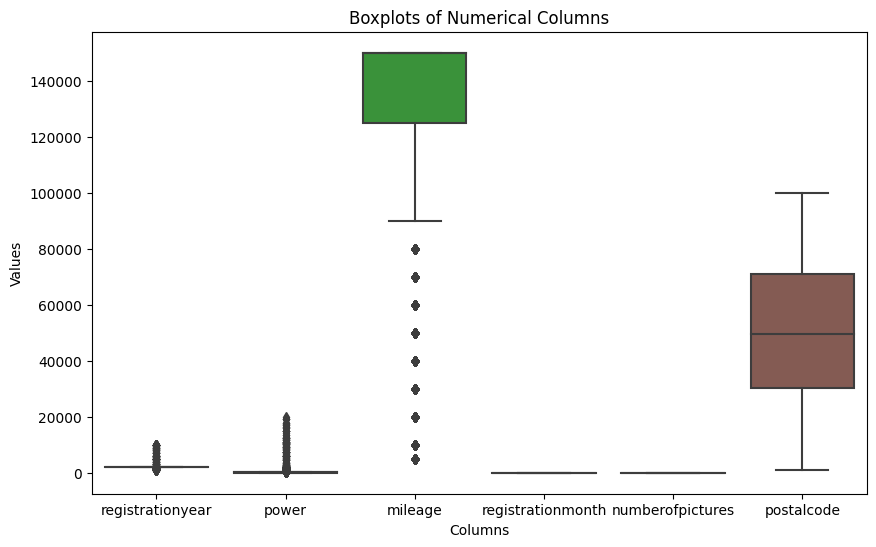

In [12]:
# gerando os boxplots para analisar outliers

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=features[numerical_cols])
plt.title("Boxplots of Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [13]:
# analisando a perda caso sejam descartados os outliers

# threshold para outliers (1.5 * IQR)
threshold = 1.5

outlier_stats = {}

# calculando quartis 25 e 75 para cada coluna numérica
for col in features.select_dtypes(include=['int64', 'float64']).columns:
    
    q1 = features[col].quantile(0.25)
    q3 = features[col].quantile(0.75)
    
    # Calculando IQR
    iqr = q3 - q1
    
    # Definindo limites para outliers
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    
    # identificando outliers
    outliers = features[(features[col] < lower_bound) | (features[col] > upper_bound)]
    
    # calculando número de outliers
    num_outliers = len(outliers)
    
    # calculando % de perda de dados
    pct_lost = (num_outliers / len(features)) * 100
    
    # atualizando dicionario
    outlier_stats[col] = {'num_outliers': num_outliers, 'pct_lost': pct_lost}


for col, stats in outlier_stats.items():
    print(f"Column: {col}")
    print(f"Number of outliers: {stats['num_outliers']}")
    print(f"Percentage of data that would be lost: {stats['pct_lost']:.2f}%")
    print()

Column: registrationyear
Number of outliers: 6309
Percentage of data that would be lost: 1.78%

Column: power
Number of outliers: 7340
Percentage of data that would be lost: 2.07%

Column: mileage
Number of outliers: 53257
Percentage of data that would be lost: 15.03%

Column: registrationmonth
Number of outliers: 0
Percentage of data that would be lost: 0.00%

Column: numberofpictures
Number of outliers: 0
Percentage of data that would be lost: 0.00%

Column: postalcode
Number of outliers: 0
Percentage of data that would be lost: 0.00%



In [14]:
features["mileage"].describe()

count    354369.000000
mean     128211.172535
std       37905.341530
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: mileage, dtype: float64

## Conclusion
We can discard outliers from the `registration year` and `power` columns since the loss of data is minimal. However, we will need to handle outliers in the `mileage` column.


In [15]:
# checando a normalidade da distribuição de mileage

# Anderson-Darling test
result = anderson(features['mileage'])
print(f"Anderson-Darling test: statistic={result.statistic:.2f}, critical values={result.critical_values}, significance level={result.significance_level}")

# Shapiro-Wilk test
stat, p = shapiro(features['mileage'])
print(f"Shapiro-Wilk test: statistic={stat:.2f}, p-value={p:.2f}")

Anderson-Darling test: statistic=56653.12, critical values=[0.576 0.656 0.787 0.918 1.092], significance level=[15.  10.   5.   2.5  1. ]
Shapiro-Wilk test: statistic=0.63, p-value=0.00


/opt/conda/envs/python3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Conclusion: Mileage is not normally distributed

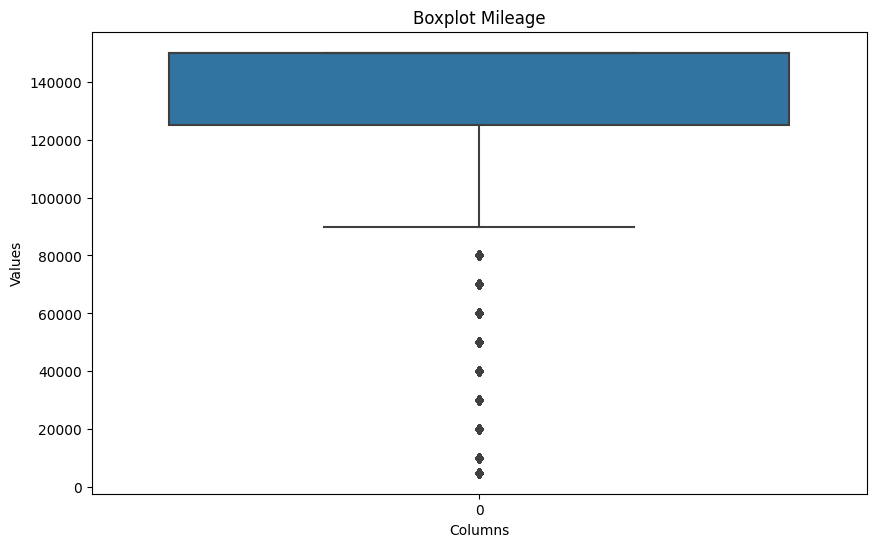

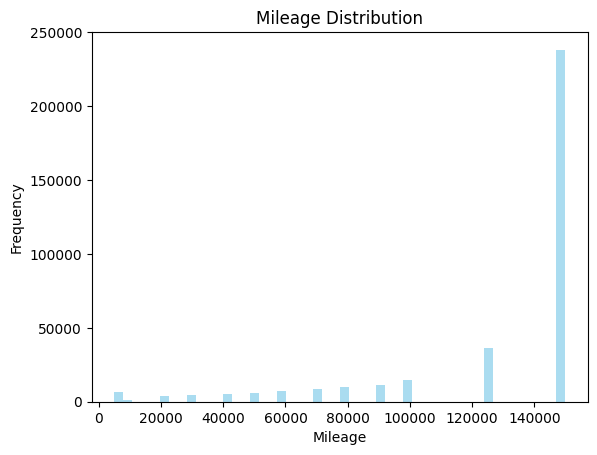

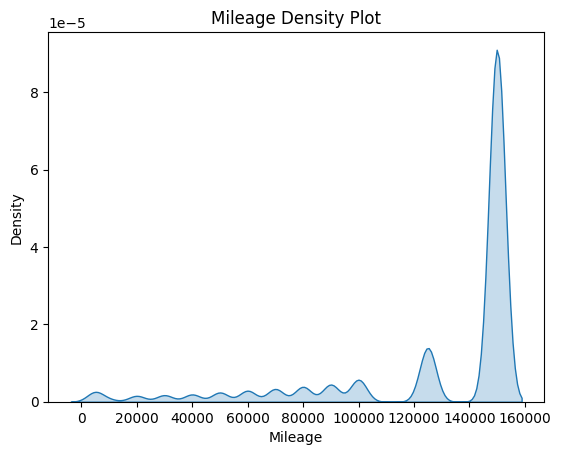

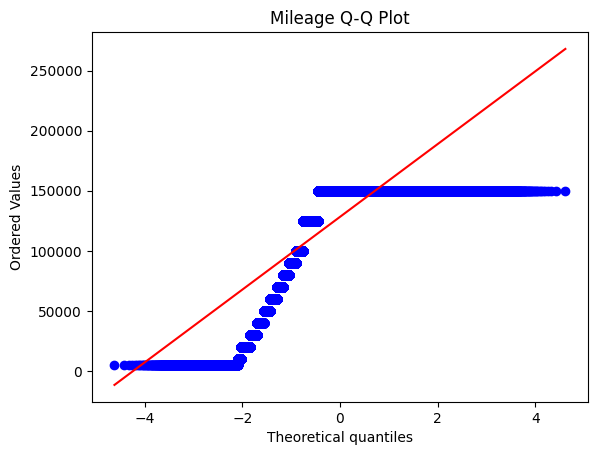

In [16]:
# visualizando Mileage

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=features["mileage"])
plt.title("Boxplot Mileage")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

# Histogram
plt.hist(features['mileage'], bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Mileage Distribution')
plt.show()

# Density Plot
sns.kdeplot(features['mileage'], shade=True)
plt.xlabel('Mileage')
plt.ylabel('Density')
plt.title('Mileage Density Plot')
plt.show()

# Q-Q Plot
import scipy.stats as stats
stats.probplot(features['mileage'], dist='norm', plot=plt)
plt.title('Mileage Q-Q Plot')
plt.show()

## Conclusion
The `mileage` column is left-skewed because the outliers are concentrated towards "lower mileage." Therefore, we will transform the data to stabilize variance and improve symmetry.


In [17]:
# transformando dados usando square root
sqrt_mileage = np.sqrt(df['mileage'])

# testando normalidade novamente
# Anderson-Darling test
result2 = anderson(sqrt_mileage)
print(f"Anderson-Darling test: statistic={result2.statistic:.2f}, critical values={result2.critical_values}, significance level={result2.significance_level}")
print("")


# Shapiro-Wilk test
stat2, p2 = shapiro(sqrt_mileage)
print(f"Shapiro-Wilk test: statistic={stat2:.2f}, p-value={p2:.2f}")

Anderson-Darling test: statistic=58207.55, critical values=[0.576 0.656 0.787 0.918 1.092], significance level=[15.  10.   5.   2.5  1. ]

Shapiro-Wilk test: statistic=0.60, p-value=0.00


/opt/conda/envs/python3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


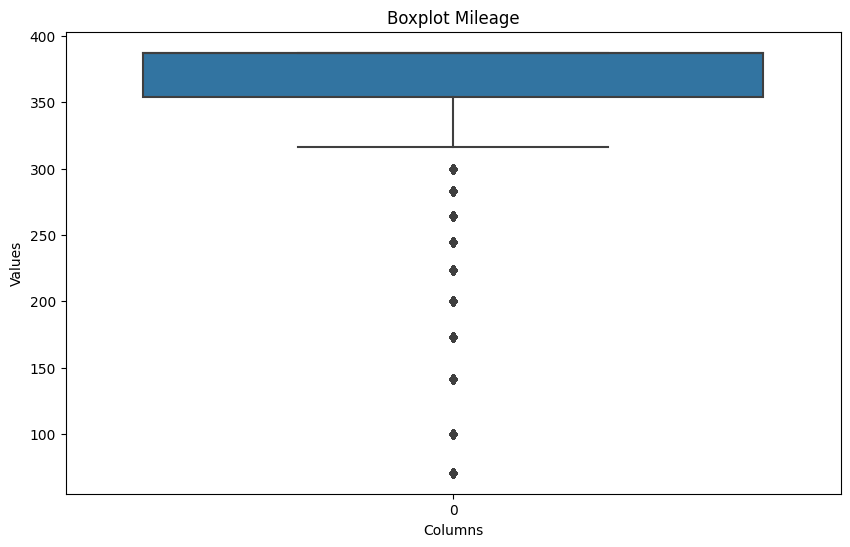

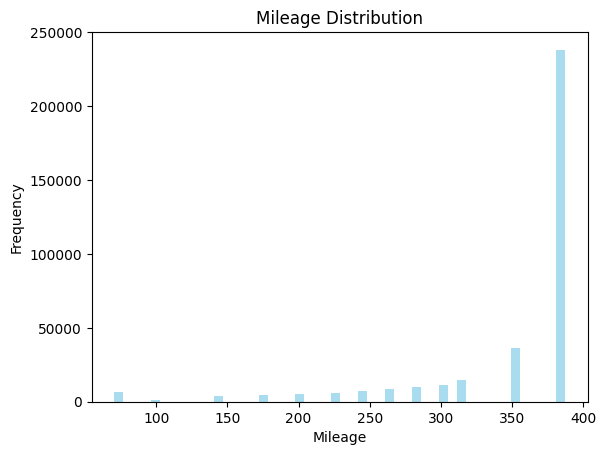

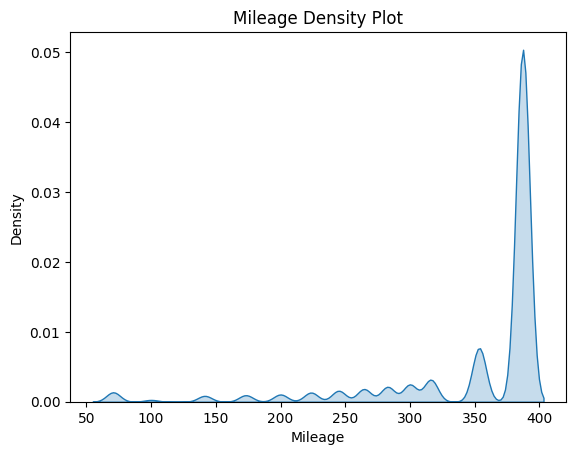

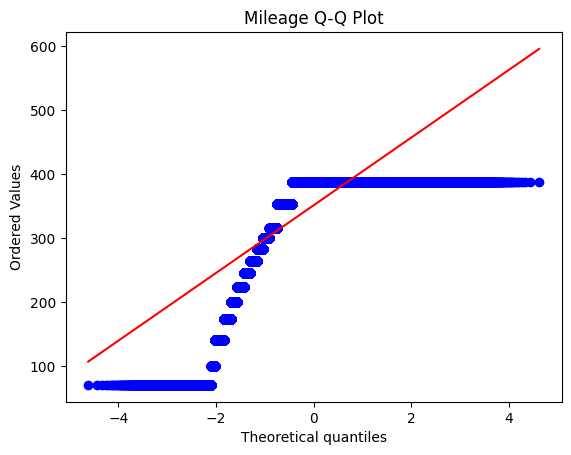

In [18]:
# visualizando Mileage após a transformação

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=sqrt_mileage)
plt.title("Boxplot Mileage")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

# Histogram
plt.hist(sqrt_mileage, bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Mileage Distribution')
plt.show()

# Density Plot
sns.kdeplot(sqrt_mileage, shade=True)
plt.xlabel('Mileage')
plt.ylabel('Density')
plt.title('Mileage Density Plot')
plt.show()

# Q-Q Plot
import scipy.stats as stats
stats.probplot(sqrt_mileage, dist='norm', plot=plt)
plt.title('Mileage Q-Q Plot')
plt.show()

Conclusion: Square root transformation did not eliminate non-normality, let's try box-cox transformation

In [19]:
# transformando com boxcox
bc_mileage, lam = boxcox(features['mileage'])

# testando normalidade novamente
# Anderson-Darling test
result3 = anderson(bc_mileage)
print(f"Anderson-Darling test: statistic={result3.statistic:.2f}, critical values={result3.critical_values}, significance level={result3.significance_level}")
print("")


# Shapiro-Wilk test
stat3, p3 = shapiro(bc_mileage)
print(f"Shapiro-Wilk test: statistic={stat3:.2f}, p-value={p3:.2f}")

Anderson-Darling test: statistic=58243.58, critical values=[0.576 0.656 0.787 0.918 1.092], significance level=[15.  10.   5.   2.5  1. ]

Shapiro-Wilk test: statistic=0.66, p-value=0.00


/opt/conda/envs/python3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Conclusion
The `mileage` data remains non-normal even after applying the Box-Cox transformation, indicating that it is inherently non-normal. Therefore, we will proceed with winsorization and truncation techniques.


In [20]:
# calculando thresholds
mileage = features["mileage"].values
p10 = np.percentile(mileage, 10)
p90 = np.percentile(mileage, 90)

# winsor
mileage_winsorized = np.clip(mileage, p10, p90)

# truncate
mileage_truncated = mileage_winsorized[(mileage_winsorized > (np.mean(mileage_winsorized) - 3 * np.std(mileage_winsorized))) & 
                                       (mileage_winsorized < (np.mean(mileage_winsorized) + 3 * np.std(mileage_winsorized)))]

# re testando normalidade
# Anderson-Darling test
result4 = anderson(mileage_truncated)
print(f"Anderson-Darling test: statistic={result4.statistic:.2f}, critical values={result4.critical_values}, significance level={result4.significance_level}")
print("")


# Shapiro-Wilk test
stat4, p4 = shapiro(mileage_truncated)
print(f"Shapiro-Wilk test: statistic={stat4:.2f}, p-value={p4:.2f}")

Anderson-Darling test: statistic=60197.75, critical values=[0.576 0.656 0.787 0.918 1.092], significance level=[15.  10.   5.   2.5  1. ]

Shapiro-Wilk test: statistic=0.64, p-value=0.00


## Conclusion
After applying winsorization and truncation, the `mileage` data still remains non-normal. Therefore, we will use censoring and replace the outliers with the minimum mileage value from the dataset (excluding outliers).


In [21]:
# calculando threshold de outliers
out_threshold = np.mean(mileage) - 3 * np.std(mileage)
print(out_threshold)

14495.308394309206


In [22]:
# Calculate the quartiles
mileageQ1 = np.percentile(mileage, 25)
mileageQ3 = np.percentile(mileage, 75)

# Calculate the IQR
mileageIQR = mileageQ3 - mileageQ1

# Calculate the whisker values
lower_whisker = mileageQ1 - 1.5 * mileageIQR

In [23]:
# censurando left-skewed outliers
mileage_censored = np.where(mileage < lower_whisker, lower_whisker, mileage)

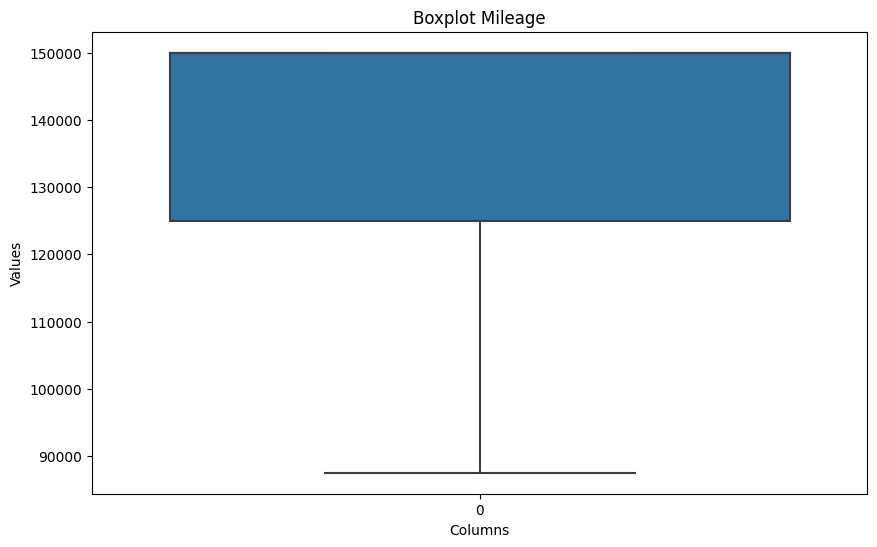

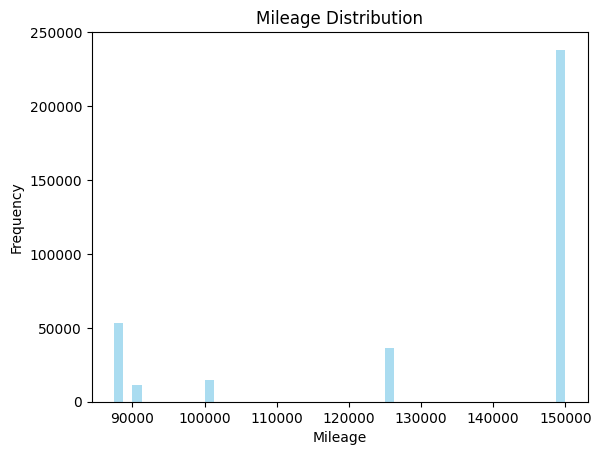

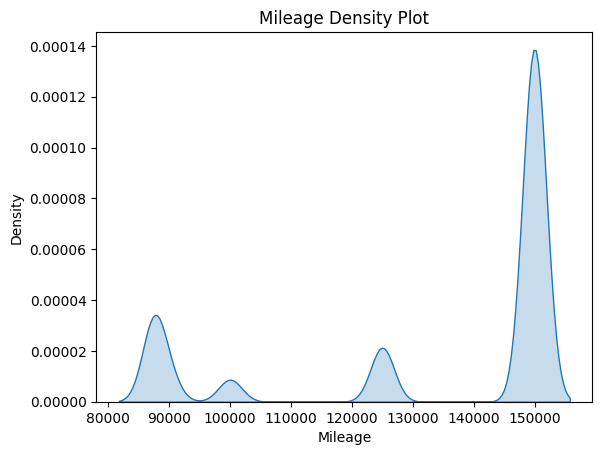

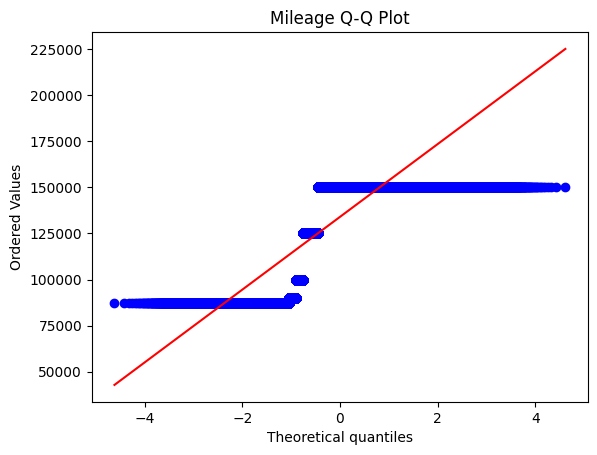

In [24]:
# visualizando Mileage após a censura

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=mileage_censored)
plt.title("Boxplot Mileage")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

# Histogram
plt.hist(mileage_censored, bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Mileage Distribution')
plt.show()

# Density Plot
sns.kdeplot(mileage_censored, shade=True)
plt.xlabel('Mileage')
plt.ylabel('Density')
plt.title('Mileage Density Plot')
plt.show()

# Q-Q Plot
import scipy.stats as stats
stats.probplot(mileage_censored, dist='norm', plot=plt)
plt.title('Mileage Q-Q Plot')
plt.show()

In [25]:
# removendo right-skewed outliers das colunas power e registration year

power = features["power"].values
regyear = features["registrationyear"].values

# calculando thresholds para cada coluna
threshold1 = np.mean(power) + 3 * np.std(power)
threshold2 = np.mean(regyear) + 3 * np.std(regyear)

# identificando os índices dos outliers em cada coluna
outlier_indices1 = np.where(power > threshold1)[0]
outlier_indices2 = np.where(regyear > threshold2)[0]

# combinando os indices de outliers das duas colunas
outlier_indices = np.union1d(outlier_indices1, outlier_indices2)
print(len(outlier_indices))

458


In [26]:
# Juntando a coluna mileage_censored de volta para as features
features["mileage_censored"] = mileage_censored
print(features.head(10))

          datecrawled  vehicletype  registrationyear gearbox  power    model  \
0 2016-03-24 11:52:00      unknown              1993  manual      0     golf   
1 2016-03-24 10:58:00        coupe              2011  manual    190  unknown   
2 2016-03-14 12:52:00          suv              2004    auto    163    grand   
3 2016-03-17 16:54:00        small              2001  manual     75     golf   
4 2016-03-31 17:25:00        small              2008  manual     69    fabia   
5 2016-04-04 17:36:00        sedan              1995  manual    102      3er   
6 2016-04-01 20:48:00  convertible              2004  manual    109  2_reihe   
7 2016-03-21 18:54:00        sedan              1980  manual     50    other   
8 2016-04-04 23:42:00          bus              2014  manual    125    c_max   
9 2016-03-17 10:53:00        small              1998  manual    101     golf   

   mileage  registrationmonth  fueltype       brand notrepaired datecreated  \
0   150000                  0    petrol 

In [27]:
# removendo das fdeatures as observações correspondentes aos indices de outliers removidos de power e registration year
features = features.drop(features.index[outlier_indices])

In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353911 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        353911 non-null  datetime64[ns]
 1   vehicletype        353911 non-null  object        
 2   registrationyear   353911 non-null  int64         
 3   gearbox            353911 non-null  object        
 4   power              353911 non-null  int64         
 5   model              353911 non-null  object        
 6   mileage            353911 non-null  int64         
 7   registrationmonth  353911 non-null  int64         
 8   fueltype           353911 non-null  object        
 9   brand              353911 non-null  object        
 10  notrepaired        353911 non-null  object        
 11  datecreated        353911 non-null  datetime64[ns]
 12  numberofpictures   353911 non-null  int64         
 13  postalcode         353911 non-null  int64   

In [29]:
# codifidando variáveis categóricas com OHE,dropando a primeira coluna 
categorical = ['gearbox','fueltype','notrepaired','vehicletype']
features = pd.get_dummies(features,columns=categorical)


In [30]:
# codificando variaveis categoricas com label encoder pois possuem alta cardinalidade e nao tem uma ordem lógica

categorical_cols = ['brand', 'model']

# applicando LabelEncoder para cada coluna
for col in categorical_cols:
    le = LabelEncoder()
    features[f"{col}_encoded"] = le.fit_transform(features[col])
    
# removendo colunas desnecessarias
features.drop(columns=['model', 'brand'], inplace=True)

In [31]:
features.head(10)

,datecrawled,registrationyear,power,mileage,registrationmonth,datecreated,numberofpictures,postalcode,lastseen,mileage_censored,...,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_unknown,vehicletype_wagon,brand_encoded,model_encoded
0,2016-03-24 11:52:00,1993,0,150000,0,2016-03-24,0,70435,2016-04-07 03:16:00,150000.0,...,0,0,0,0,0,0,1,0,38,116
1,2016-03-24 10:58:00,2011,190,125000,5,2016-03-24,0,66954,2016-04-07 01:46:00,125000.0,...,0,1,0,0,0,0,0,0,1,228
2,2016-03-14 12:52:00,2004,163,125000,8,2016-03-14,0,90480,2016-04-05 12:47:00,125000.0,...,0,0,0,0,0,1,0,0,14,117
3,2016-03-17 16:54:00,2001,75,150000,6,2016-03-17,0,91074,2016-03-17 17:40:00,150000.0,...,0,0,0,0,1,0,0,0,38,116
4,2016-03-31 17:25:00,2008,69,90000,7,2016-03-31,0,60437,2016-04-06 10:17:00,90000.0,...,0,0,0,0,1,0,0,0,31,101
5,2016-04-04 17:36:00,1995,102,150000,10,2016-04-04,0,33775,2016-04-06 19:17:00,150000.0,...,0,0,0,1,0,0,0,0,2,11
6,2016-04-01 20:48:00,2004,109,150000,8,2016-04-01,0,67112,2016-04-05 18:18:00,150000.0,...,1,0,0,0,0,0,0,0,25,8
7,2016-03-21 18:54:00,1980,50,40000,7,2016-03-21,0,19348,2016-03-25 16:47:00,87500.0,...,0,0,0,1,0,0,0,0,38,166
8,2016-04-04 23:42:00,2014,125,30000,8,2016-04-04,0,94505,2016-04-04 23:42:00,87500.0,...,0,0,0,0,0,0,0,0,10,60
9,2016-03-17 10:53:00,1998,101,150000,0,2016-03-17,0,27472,2016-03-31 17:17:00,150000.0,...,0,0,0,0,1,0,0,0,38,116


In [32]:
# escalando as variáveis numéricas
numeric = ['registrationyear','power','mileage_censored','registrationmonth','numberofpictures','postalcode']
# numeric = features.select_dtypes(include=['int64', 'float64']).columns
scaler = MaxAbsScaler()
scaler.fit(features[numeric])

features[numeric] = scaler.transform(features[numeric])

In [33]:
features.head(10)

,datecrawled,registrationyear,power,mileage,registrationmonth,datecreated,numberofpictures,postalcode,lastseen,mileage_censored,...,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_unknown,vehicletype_wagon,brand_encoded,model_encoded
0,2016-03-24 11:52:00,0.896940,0.000000,150000,0.000000,2016-03-24,0.0,0.704364,2016-04-07 03:16:00,1.000000,...,0,0,0,0,0,0,1,0,38,116
1,2016-03-24 10:58:00,0.905041,0.280236,125000,0.416667,2016-03-24,0.0,0.669553,2016-04-07 01:46:00,0.833333,...,0,1,0,0,0,0,0,0,1,228
2,2016-03-14 12:52:00,0.901890,0.240413,125000,0.666667,2016-03-14,0.0,0.904818,2016-04-05 12:47:00,0.833333,...,0,0,0,0,0,1,0,0,14,117
3,2016-03-17 16:54:00,0.900540,0.110619,150000,0.500000,2016-03-17,0.0,0.910758,2016-03-17 17:40:00,1.000000,...,0,0,0,0,1,0,0,0,38,116
4,2016-03-31 17:25:00,0.903690,0.101770,90000,0.583333,2016-03-31,0.0,0.604382,2016-04-06 10:17:00,0.600000,...,0,0,0,0,1,0,0,0,31,101
5,2016-04-04 17:36:00,0.897840,0.150442,150000,0.833333,2016-04-04,0.0,0.337757,2016-04-06 19:17:00,1.000000,...,0,0,0,1,0,0,0,0,2,11
6,2016-04-01 20:48:00,0.901890,0.160767,150000,0.666667,2016-04-01,0.0,0.671133,2016-04-05 18:18:00,1.000000,...,1,0,0,0,0,0,0,0,25,8
7,2016-03-21 18:54:00,0.891089,0.073746,40000,0.583333,2016-03-21,0.0,0.193484,2016-03-25 16:47:00,0.583333,...,0,0,0,1,0,0,0,0,38,166
8,2016-04-04 23:42:00,0.906391,0.184366,30000,0.666667,2016-04-04,0.0,0.945069,2016-04-04 23:42:00,0.583333,...,0,0,0,0,0,0,0,0,10,60
9,2016-03-17 10:53:00,0.899190,0.148968,150000,0.000000,2016-03-17,0.0,0.274725,2016-03-31 17:17:00,1.000000,...,0,0,0,0,1,0,0,0,38,116


In [34]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353911 entries, 0 to 354368
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   datecrawled              353911 non-null  datetime64[ns]
 1   registrationyear         353911 non-null  float64       
 2   power                    353911 non-null  float64       
 3   mileage                  353911 non-null  int64         
 4   registrationmonth        353911 non-null  float64       
 5   datecreated              353911 non-null  datetime64[ns]
 6   numberofpictures         353911 non-null  float64       
 7   postalcode               353911 non-null  float64       
 8   lastseen                 353911 non-null  datetime64[ns]
 9   mileage_censored         353911 non-null  float64       
 10  gearbox_auto             353911 non-null  uint8         
 11  gearbox_manual           353911 non-null  uint8         
 12  gearbox_unknown 

In [35]:
# removendo colunas desnecessárias nas features
features.drop(columns=['datecrawled','mileage','datecreated','lastseen'],inplace=True)

In [36]:
# removendo observações do target
target = target.drop(target.index[outlier_indices])

In [37]:
# criando os conjuntos de treinamento e validação
features_train,features_valid,target_train,target_valid = train_test_split(features,target,test_size=.25,random_state=12345)

In [38]:
features_train.shape, features_valid.shape

((265433, 31), (88478, 31))

## Model Training

In [39]:
# treinando regressão linear

lr_reg = LinearRegression()
lr_reg.fit(features_train, target_train)
pred_linear = lr_reg.predict(features_valid)
rmse_linear = np.sqrt(mean_squared_error(target_valid, pred_linear))
r2_linear = r2_score(target_valid,pred_linear)
print("Linear Regression:")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")

Linear Regression:
RMSE: 3117.35
R²: 0.52


In [40]:
# treinando decision tree
%time
tree_reg = DecisionTreeRegressor()
tree_reg.fit(features_train, target_train)
pred_tree = tree_reg.predict(features_valid)
rmse_tree = np.sqrt(mean_squared_error(target_valid, pred_tree))
r2_tree = r2_score(target_valid, pred_tree)
print("Decision Tree Regression:")
print(f"RMSE: {rmse_tree:.2f}")
print(f"R²: {r2_tree:.2f}")

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 5.96 µs
Decision Tree Regression:
RMSE: 2354.84
R²: 0.73


In [41]:
# treinando random forest
%time
rf_reg = RandomForestRegressor(n_estimators=10)
rf_reg.fit(features_train, target_train)
pred_rf = rf_reg.predict(features_valid)
rmse_rf = np.sqrt(mean_squared_error(target_valid, pred_rf))
r2_rf = r2_score(target_valid, pred_rf)
print("Random Forest Regression:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Random Forest Regression:
RMSE: 1818.85
R²: 0.84


In [43]:
lr_t0 = time.perf_counter()
# otimizando Linear Regression

lr_reg = LinearRegression(copy_X=True, fit_intercept=False,normalize=True)
lr_reg.fit(features_train,target_train)

# previsões
pred_lr = lr_reg.predict(features_valid)

# calculando mean squared error
rmse_lr = np.sqrt(mean_squared_error(target_valid, pred_lr))

print("Linear Regression:")

print(f"RMSE: {rmse_lr:.2f}")

lr_t1 = time.perf_counter()
lr_time = lr_t1 - lr_t0

Linear Regression:
RMSE: 3117.35


In [44]:
dt_t0 = time.perf_counter()
# otimizando Decision Tree Regressor

tree_reg = DecisionTreeRegressor(max_depth=15,min_samples_leaf=10, min_samples_split=2)
tree_reg.fit(features_train, target_train)

# previsões
pred_dt = tree_reg.predict(features_valid)

# calculando mean squared error
rmse_dt = np.sqrt(mean_squared_error(target_valid, pred_dt))

print("Decision Tree Regressor:")
print(f"RMSE: {rmse_dt:.2f}")

dt_t1 = time.perf_counter()
dt_time = dt_t1 - dt_t0

Decision Tree Regressor:
RMSE: 2001.72


In [45]:
rf_t0 = time.perf_counter()
# otimizando Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5)
rf_reg.fit(features_train, target_train)

# previsões
pred_rf = rf_reg.predict(features_valid)

# calculando mean squared error
rmse_rf = np.sqrt(mean_squared_error(target_valid, pred_rf))

print("Random Forest Regressor:")
print(f"RMSE: {rmse_rf:.2f}")

rf_t1 = time.perf_counter()
rf_time = rf_t1 - rf_t0

Random Forest Regressor:
RMSE: 2028.79


In [47]:
lgb_t0 = time.perf_counter()
# treinando modelo otimizado com LGB

lgb_reg = lgb.LGBMRegressor(learning_rate=0.1, max_depth=7, n_estimators=50, num_leaves=20)
lgb_reg.fit(features_train, target_train)

# previsões
pred_lgb = lgb_reg.predict(features_valid)

# calculando mean squared error
rmse_lgb = np.sqrt(mean_squared_error(target_valid, pred_lgb))

print("LightGBM:")
print(f'RMSE: {rmse_lgb:.2f}')

lgb_t1 = time.perf_counter()
lgb_time = lgb_t1 - lgb_t0

LightGBM:
RMSE: 2002.55


In [48]:
gb_t0 = time.perf_counter()
# treinando modelo otimizado com GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(learning_rate=0.5, max_depth=7, max_features='sqrt', n_estimators=50, subsample=0.8)
gb_reg.fit(features_train, target_train)

# previsões
pred_gb = gb_reg.predict(features_valid)

# calculando mean squared error
rmse_gb = np.sqrt(mean_squared_error(target_valid, pred_gb))

print("GradientBoostingRegressor:")
print(f'RMSE: {rmse_gb:.2f}')

gb_t1 = time.perf_counter()
gb_time = gb_t1 - gb_t0

GradientBoostingRegressor:
RMSE: 1929.93


In [49]:
cat_t0 = time.perf_counter()
# treinando modelo otimizado com CatBoost

cat_reg = CatBoostRegressor(depth=7, iterations=50, l2_leaf_reg=0.1, learning_rate=0.5)
cat_reg.fit(features_train, target_train)

# previsões
pred_cat = cat_reg.predict(features_valid)

# calculando mean squared error
rmse_cat = np.sqrt(mean_squared_error(target_valid, pred_cat))

print("CatBoost Regressor:")
print(f'RMSE: {rmse_cat:.2f}')

cat_t1 = time.perf_counter()
cat_time = cat_t1 - cat_t0

0:	learn: 3242.7498281	total: 116ms	remaining: 5.67s
1:	learn: 2666.3624162	total: 182ms	remaining: 4.36s
2:	learn: 2398.8063770	total: 244ms	remaining: 3.83s
3:	learn: 2283.2986316	total: 304ms	remaining: 3.5s
4:	learn: 2194.9093136	total: 367ms	remaining: 3.31s
5:	learn: 2150.6101603	total: 425ms	remaining: 3.11s
6:	learn: 2123.2079509	total: 478ms	remaining: 2.94s
7:	learn: 2076.5930507	total: 548ms	remaining: 2.87s
8:	learn: 2052.2592353	total: 607ms	remaining: 2.76s
9:	learn: 2037.0943331	total: 668ms	remaining: 2.67s
10:	learn: 2014.3136262	total: 731ms	remaining: 2.59s
11:	learn: 2000.1718183	total: 793ms	remaining: 2.51s
12:	learn: 1987.2049958	total: 852ms	remaining: 2.43s
13:	learn: 1975.9366144	total: 918ms	remaining: 2.36s
14:	learn: 1970.5574688	total: 976ms	remaining: 2.28s
15:	learn: 1959.7188297	total: 1.04s	remaining: 2.21s
16:	learn: 1949.7738213	total: 1.1s	remaining: 2.13s
17:	learn: 1943.8406892	total: 1.15s	remaining: 2.04s
18:	learn: 1933.5912553	total: 1.21s	rem

In [50]:
xgb_t0 = time.perf_counter()
# treinando modelo otimizado com XGBoost Regressor

xgb_reg = XGBRegressor(gamma=0, learning_rate=0.5, max_depth=7, n_estimators=50)
xgb_reg.fit(features_train, target_train)

# previsões
pred_xgb = xgb_reg.predict(features_valid)

# calculando mean squared error
rmse_xgb = np.sqrt(mean_squared_error(target_valid, pred_xgb))

print("XGBoost Regressor:")
print(f'RMSE: {rmse_xgb:.2f}')

xgb_t1 = time.perf_counter()
xgb_time = xgb_t1 - xgb_t0

XGBoost Regressor:
RMSE: 1818.23


## Model Analysis

In [51]:
# Criando um dicionário e dataframe para consolidar os nomes dos modelos e MSEs
mse_dict = {
    'Model Name': ['Linear Regression', 'Decision Tree','Random Forest','LightGB','GradientBoosting','CatBoost', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_lgb, rmse_gb, rmse_cat, rmse_xgb],
    'Time(s)': [lr_time, dt_time, rf_time, lgb_time, gb_time, cat_time, xgb_time]
}

mse_df = pd.DataFrame(mse_dict)

print(mse_df)

          Model Name         RMSE    Time(s)
0  Linear Regression  3117.352007   0.631018
1      Decision Tree  2001.718420   2.303014
2      Random Forest  2028.791328  56.139108
3            LightGB  2002.553863   3.127458
4   GradientBoosting  1929.929530  11.883024
5           CatBoost  1867.959478   3.600214
6            XGBoost  1818.232296  45.313120


## Conclusion
The most accurate model was **XGBoost** with an **RMSE of 1818**, but it was the second slowest in terms of training time (**45 seconds**). The **CatBoost** model was the second most accurate (**RMSE of 1868**), with a significantly faster training time of just **3.6 seconds**.
